# Example of applying extinction corrections based on Balmer decrement
## In this example we test out the PG16S metallicity calibrator before and after extinction correction.

In [1]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from edge_pydb import EdgeTable
from edge_pydb.plotting import xy2hist
from edge_pydb.conversion import get_Alambda
np.seterr(invalid='ignore')
plt.rcParams["scatter.edgecolors"] = 'none'

In [2]:
fluxtab = EdgeTable('edge_carma.2d_smo7.hdf5', path='flux_elines_sm')
print(fluxtab.colnames)

['Name', 'ix', 'iy', 'ra_abs', 'dec_abs', 'ra_off', 'dec_off', 'rad_arc', 'azi_ang', 'flux_[OII]3727_sm', 'flux_[OIII]5007_sm', 'flux_[OIII]4959_sm', 'flux_Hbeta_sm', 'flux_[OI]6300_sm', 'flux_Halpha_sm', 'flux_[NII]6583_sm', 'flux_[NII]6548_sm', 'flux_[SII]6717_sm', 'flux_[SII]6731_sm', 'vel_[OII]3727_sm', 'vel_[OIII]5007_sm', 'vel_[OIII]4959_sm', 'vel_Hbeta_sm', 'vel_[OI]6300_sm', 'vel_Halpha_sm', 'vel_[NII]6583_sm', 'vel_[NII]6548_sm', 'vel_[SII]6717_sm', 'vel_[SII]6731_sm', 'disp_[OII]3727_sm', 'disp_[OIII]5007_sm', 'disp_[OIII]4959_sm', 'disp_Hbeta_sm', 'disp_[OI]6300_sm', 'disp_Halpha_sm', 'disp_[NII]6583_sm', 'disp_[NII]6548_sm', 'disp_[SII]6717_sm', 'disp_[SII]6731_sm', 'EW_[OII]3727_sm', 'EW_[OIII]5007_sm', 'EW_[OIII]4959_sm', 'EW_Hbeta_sm', 'EW_[OI]6300_sm', 'EW_Halpha_sm', 'EW_[NII]6583_sm', 'EW_[NII]6548_sm', 'EW_[SII]6717_sm', 'EW_[SII]6731_sm', 'e_flux_[OII]3727_sm', 'e_flux_[OIII]5007_sm', 'e_flux_[OIII]4959_sm', 'e_flux_Hbeta_sm', 'e_flux_[OI]6300_sm', 'e_flux_Halpha_sm

## Load data from the HDF5 files

In [3]:
fluxcols = ['Name','ix','iy',
            'flux_Halpha_sm','e_flux_Halpha_sm',
            'flux_Hbeta_sm','e_flux_Hbeta_sm',
            'flux_[OII]3727_sm',
            'flux_[OIII]5007_sm',
            'flux_[OIII]4959_sm',
            'flux_[NII]6583_sm',
            'flux_[NII]6548_sm', 
            'flux_[SII]6717_sm', 
            'flux_[SII]6731_sm',
            'flux_AHa_corr_sm','ZOH_sm','ZOH_PP04_sm']
sspcols = ['Name','ix','iy','sigstar_sm']

fluxtab = EdgeTable('edge_carma.2d_smo7.hdf5', path='flux_elines_sm', cols=fluxcols)
ssptab  = EdgeTable('edge_carma.2d_smo7.hdf5', path='SSP_sm', cols=sspcols)
print('Working on full EDGE database')

Working on full EDGE database


## Build the table

In [4]:
fluxtab.join(ssptab, keys=['Name', 'ix', 'iy'])
goodval = ((fluxtab['sigstar_sm']>0) & (fluxtab['ZOH_sm']>0) & (fluxtab['ZOH_PP04_sm']>0))
fluxtab = fluxtab[goodval]
print(fluxtab.colnames)

['Name', 'ix', 'iy', 'flux_[OII]3727_sm', 'flux_[OIII]5007_sm', 'flux_[OIII]4959_sm', 'flux_Hbeta_sm', 'flux_Halpha_sm', 'flux_[NII]6583_sm', 'flux_[NII]6548_sm', 'flux_[SII]6717_sm', 'flux_[SII]6731_sm', 'e_flux_Hbeta_sm', 'e_flux_Halpha_sm', 'flux_AHa_corr_sm', 'ZOH_sm', 'ZOH_PP04_sm', 'sigstar_sm']


In [5]:
fluxtab

Name,ix,iy,flux_[OII]3727_sm,flux_[OIII]5007_sm,flux_[OIII]4959_sm,flux_Hbeta_sm,flux_Halpha_sm,flux_[NII]6583_sm,flux_[NII]6548_sm,flux_[SII]6717_sm,flux_[SII]6731_sm,e_flux_Hbeta_sm,e_flux_Halpha_sm,flux_AHa_corr_sm,ZOH_sm,ZOH_PP04_sm,sigstar_sm
,,,1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),mag,dex,dex,solMass / pc2
bytes13,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
IC0480,49,73,0.0870074,0.029897282,0.00988701,0.090097725,0.1102351,0.039026078,0.03247296,0.052571528,0.07800524,0.04135729,0.021687174,-2.1596358,8.539017,8.738997,12.573614
IC0480,52,37,0.18770462,0.0006616841,0.020474317,0.077797696,0.13354938,0.04970629,-0.0033357728,-0.008401535,0.0081396485,0.050240315,0.015807211,-1.2983286,8.884192,9.255148,26.140268
IC0480,52,40,0.032523226,0.015297297,0.019732146,0.095175065,0.24623917,0.08073771,0.0021618328,0.06013462,0.03042223,0.038109075,0.015223875,-0.2549448,8.59926,8.829081,24.226116
IC0480,52,43,0.20427044,0.035552263,0.021748396,0.06439884,0.3144415,0.091267064,0.014382704,0.10108422,0.055692498,0.053109188,0.015992831,1.360436,8.473248,8.640651,31.621964
IC0480,52,46,0.40225303,0.04589472,0.014781727,0.042140394,0.29628724,0.06591417,0.017525518,0.10502746,0.09001239,0.026825199,0.01795241,2.2878246,8.385384,8.509265,54.41814
IC0480,52,49,0.5109807,0.04305821,-0.016751453,0.08713781,0.31298056,0.050059613,0.03223156,0.10246124,0.107932776,0.047718827,0.021215593,0.5794677,8.428165,8.573238,27.101135
IC0480,52,52,0.7282568,0.046769876,-0.025693739,0.11716338,0.32595628,0.06137293,0.02597816,0.1093184,0.10446421,0.03686725,0.021137634,-0.07026943,8.46316,8.625566,23.207003
IC0480,52,55,0.9046924,0.07557559,-0.035164747,0.10379839,0.32900062,0.085429996,0.03418405,0.1176154,0.09720425,0.0544134,0.026175255,0.26143375,8.437176,8.586711,21.871445


## Compare metallicity estimates without extinction

In [6]:
N2F  = fluxtab['flux_[NII]6583_sm']
N2Fb = fluxtab['flux_[NII]6548_sm']
S2F  = fluxtab['flux_[SII]6717_sm']
S2Fb = fluxtab['flux_[SII]6731_sm']
O2F  = fluxtab['flux_[OII]3727_sm']
O3F  = fluxtab['flux_[OIII]5007_sm']
O3Fb = fluxtab['flux_[OIII]4959_sm']
HaF  = fluxtab['flux_Halpha_sm']
HbF  = fluxtab['flux_Hbeta_sm']

R2 = np.log10(O2F)      - np.log10(HbF)
N2 = np.log10(N2Fb+N2F) - np.log10(HbF)
S2 = np.log10(S2F+S2Fb) - np.log10(HbF)
R3 = np.log10(O3Fb+O3F) - np.log10(HbF)
O3N2 = np.log10(O3F) - np.log10(HbF) - (np.log10(N2F) - np.log10(HaF))
snrcut = 3
Hbg = (abs(fluxtab['e_flux_Hbeta_sm']/fluxtab['flux_Hbeta_sm']) < 1/snrcut)
cond = Hbg & (HaF>0) & (HbF>0) & (N2F>0) & (N2Fb>0) & (S2F>0) & (S2Fb>0) & (O2F>0) & (O3F>0) & (O3Fb>0)

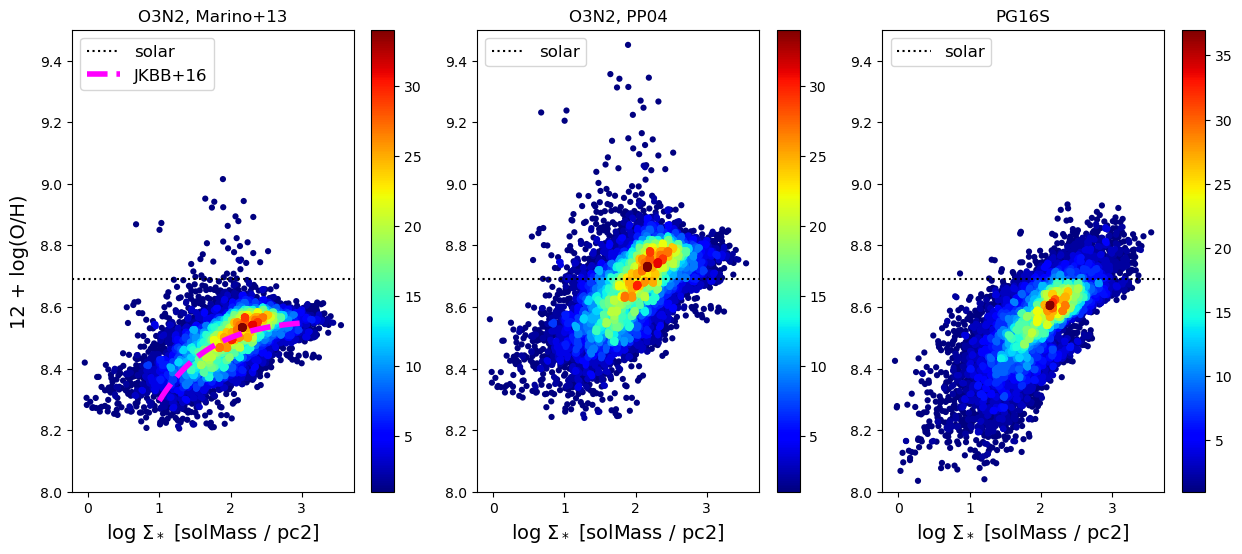

In [7]:
# Equation (2) of 2013A&A...559A.114M
ZOH_M13 = 8.533 - 0.214 * O3N2[cond]
# Equation (3) of 2004MNRAS.348L..59P
ZOH_PP04 = 8.73 - 0.32 * O3N2[cond]
# Equation (9) of 2016MNRAS.457.3678P
ZOH_PG16S = 8.445 + 0.699*N2[cond] + S2[cond]*(0.217*N2[cond] - 0.253)
# Stellar surface density
sigstar = np.log10(fluxtab['sigstar_sm'][cond])

x_det, y_det, z_det, *hist = xy2hist(sigstar, ZOH_M13, log=False)
x_pp, y_pp, z_pp, *hist_pp = xy2hist(sigstar, ZOH_PP04, log=False)
x_pg, y_pg, z_pg, *hist_pg = xy2hist(sigstar, ZOH_PG16S, log=False)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,6))
sc1 = ax1.scatter(x_det, y_det, c=z_det, s=20, cmap='jet')
cb1 = plt.colorbar(sc1)
sc2 = ax2.scatter(x_pp, y_pp, c=z_pp, s=20, cmap='jet')
cb2 = plt.colorbar(sc2)
sc3 = ax3.scatter(x_pg, y_pg, c=z_pg, s=20, cmap='jet')
cb3 = plt.colorbar(sc3)
ax1.set_title('O3N2, Marino+13')
ax2.set_title('O3N2, PP04')
ax3.set_title('PG16S')
plt.subplots_adjust(wspace=0.15)

for ax in [ax1, ax2, ax3]:
    ax.axhline(8.69, ls=':', color='k', label='solar')
    if ax == ax1:
        # From MaNGA paper, doi:10.1093/mnras/stw1984
        xmod = np.linspace(1,3,num=50)
        ymod = 8.55 + 0.014*(xmod-3.14)*np.exp(-(xmod-3.14))
        ax.plot(xmod,ymod,color='magenta',ls='--',lw=4,label='JKBB+16')
        ax.set_ylabel('12 + log(O/H)',fontsize=14,labelpad=8)
    ax.legend(loc='upper left',fontsize=12)
    ax.set_xlabel('log $\Sigma_*$ ['+str(fluxtab['sigstar_sm'].unit)+']',fontsize=14)
    ax.set_ylim([8.0, 9.5])

## Compare metallicity estimates with extinction

In [8]:
fluxcols=['flux_Hbeta_sm','flux_Halpha_sm','flux_[OII]3727_sm','flux_[NII]6548_sm','flux_[NII]6583_sm',
          'flux_[SII]6717_sm','flux_[SII]6731_sm','flux_[OIII]4959_sm','flux_[OIII]5007_sm']

In [9]:
get_Alambda(fluxtab, fluxcols, fluxtab['flux_AHa_corr_sm'])
fluxtab

Name,ix,iy,flux_[OII]3727_sm,flux_[OII]3727_avcor_sm,flux_[OIII]5007_sm,flux_[OIII]5007_avcor_sm,flux_[OIII]4959_sm,flux_[OIII]4959_avcor_sm,flux_Hbeta_sm,flux_Hbeta_avcor_sm,flux_Halpha_sm,flux_Halpha_avcor_sm,flux_[NII]6583_sm,flux_[NII]6583_avcor_sm,flux_[NII]6548_sm,flux_[NII]6548_avcor_sm,flux_[SII]6717_sm,flux_[SII]6717_avcor_sm,flux_[SII]6731_sm,flux_[SII]6731_avcor_sm,e_flux_Hbeta_sm,e_flux_Halpha_sm,flux_AHa_corr_sm,ZOH_sm,ZOH_PP04_sm,sigstar_sm
,,,1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),mag,dex,dex,solMass / pc2
bytes13,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
IC0480,49,73,0.0870074,0.0870074,0.029897282,0.029897282,0.00988701,0.00988701,0.090097725,0.090097725,0.1102351,0.1102351,0.039026078,0.039026078,0.03247296,0.03247296,0.052571528,0.052571528,0.07800524,0.07800524,0.04135729,0.021687174,0.0,8.539017,8.738997,12.573614
IC0480,52,37,0.18770462,0.18770462,0.0006616841,0.0006616841,0.020474317,0.020474317,0.077797696,0.077797696,0.13354938,0.13354938,0.04970629,0.04970629,-0.0033357728,-0.0033357728,-0.008401535,-0.008401535,0.0081396485,0.0081396485,0.050240315,0.015807211,0.0,8.884192,9.255148,26.140268
IC0480,52,40,0.032523226,0.032523226,0.015297297,0.015297297,0.019732146,0.019732146,0.095175065,0.095175065,0.24623917,0.24623917,0.08073771,0.08073771,0.0021618328,0.0021618328,0.06013462,0.06013462,0.03042223,0.03042223,0.038109075,0.015223875,0.0,8.59926,8.829081,24.226116
IC0480,52,43,0.20427044,2.160007,0.035552263,0.19784589,0.021748396,0.1236623,0.06439884,0.38339454,0.3144415,1.1008148,0.091267064,0.31800622,0.014382704,0.050530653,0.10108422,0.34123284,0.055692498,0.18738125,0.053109188,0.015992831,1.360436,8.473248,8.640651,31.621964
IC0480,52,46,0.40225303,21.230713,0.04589472,0.8229836,0.014781727,0.27483875,0.042140394,0.8464748,0.29628724,2.4369287,0.06591417,0.53784406,0.017525518,0.14500754,0.10502746,0.81255066,0.09001239,0.69251883,0.026825199,0.01795241,2.2878246,8.385384,8.509265,54.41814
IC0480,52,49,0.5109807,1.3953276,0.04305821,0.08944974,-0.016751453,-0.035120312,0.08713781,0.1863002,0.31298056,0.53370893,0.050059613,0.08519226,0.03223156,0.05504583,0.10246124,0.17203383,0.107932776,0.1809652,0.047718827,0.021215593,0.5794677,8.428165,8.573238,27.101135
IC0480,52,52,0.7282568,0.7282568,0.046769876,0.046769876,-0.025693739,-0.025693739,0.11716338,0.11716338,0.32595628,0.32595628,0.06137293,0.06137293,0.02597816,0.02597816,0.1093184,0.1093184,0.10446421,0.10446421,0.03686725,0.021137634,0.0,8.46316,8.625566,23.207003
IC0480,52,55,0.9046924,1.4234103,0.07557559,0.10510802,-0.035164747,-0.049108725,0.10379839,0.14624368,0.32900062,0.41857204,0.085429996,0.10858989,0.03418405,0.043520406,0.1176154,0.1485936,0.09720425,0.12272833,0.0544134,0.026175255,0.26143375,8.437176,8.586711,21.871445


In [10]:
N2F  = fluxtab['flux_[NII]6583_avcor_sm']
N2Fb = fluxtab['flux_[NII]6548_avcor_sm']
S2F  = fluxtab['flux_[SII]6717_avcor_sm']
S2Fb = fluxtab['flux_[SII]6731_avcor_sm']
O2F  = fluxtab['flux_[OII]3727_avcor_sm']
O3F  = fluxtab['flux_[OIII]5007_avcor_sm']
O3Fb = fluxtab['flux_[OIII]4959_avcor_sm']
HaF  = fluxtab['flux_Halpha_avcor_sm']
HbF  = fluxtab['flux_Hbeta_avcor_sm']

R2 = np.log10(O2F)      - np.log10(HbF)
N2 = np.log10(N2Fb+N2F) - np.log10(HbF)
S2 = np.log10(S2F+S2Fb) - np.log10(HbF)
R3 = np.log10(O3Fb+O3F) - np.log10(HbF)
O3N2 = np.log10(O3F) - np.log10(HbF) - (np.log10(N2F) - np.log10(HaF))
snrcut = 3
Hbg = (abs(fluxtab['e_flux_Hbeta_sm']/fluxtab['flux_Hbeta_sm']) < 1/snrcut)
cond = Hbg & (HaF>0) & (HbF>0) & (N2F>0) & (N2Fb>0) & (S2F>0) & (S2Fb>0) & (O2F>0) & (O3F>0) & (O3Fb>0)

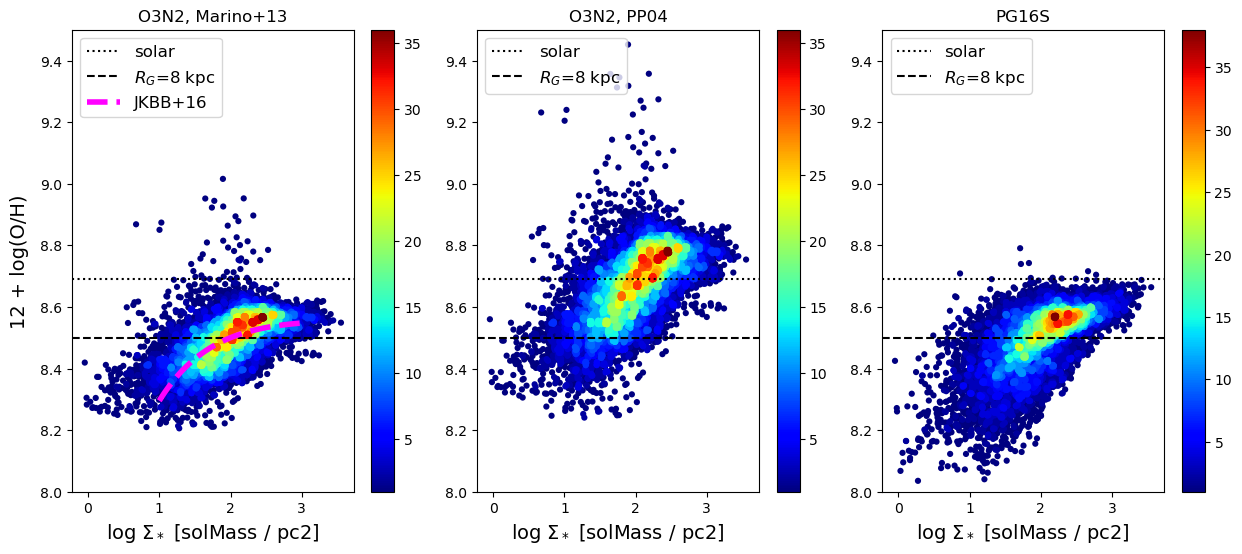

In [11]:
# Equation (2) of 2013A&A...559A.114M
ZOH_M13 = 8.533 - 0.214 * O3N2[cond]
# Equation (3) of 2004MNRAS.348L..59P
ZOH_PP04 = 8.73 - 0.32 * O3N2[cond]
# Equation (9) of 2016MNRAS.457.3678P
ZOH_PG16S = 8.445 + 0.699*N2[cond] + S2[cond]*(0.217*N2[cond] - 0.253)
# Stellar surface density
sigstar = np.log10(fluxtab['sigstar_sm'][cond])

x_det, y_det, z_det, *hist = xy2hist(sigstar, ZOH_M13, log=False)
x_pp, y_pp, z_pp, *hist_pp = xy2hist(sigstar, ZOH_PP04, log=False)
x_pg, y_pg, z_pg, *hist_pg = xy2hist(sigstar, ZOH_PG16S, log=False)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,6))
sc1 = ax1.scatter(x_det, y_det, c=z_det, s=20, cmap='jet')
cb1 = plt.colorbar(sc1)
sc2 = ax2.scatter(x_pp, y_pp, c=z_pp, s=20, cmap='jet')
cb2 = plt.colorbar(sc2)
sc3 = ax3.scatter(x_pg, y_pg, c=z_pg, s=20, cmap='jet')
cb3 = plt.colorbar(sc3)
ax1.set_title('O3N2, Marino+13')
ax2.set_title('O3N2, PP04')
ax3.set_title('PG16S')
plt.subplots_adjust(wspace=0.15)

for ax in [ax1, ax2, ax3]:
    ax.axhline(8.69, ls=':', color='k', label='solar')
    ax.axhline(8.5, ls='--', color='k', label='$R_G$=8 kpc')
    if ax == ax1:
        # From MaNGA paper, doi:10.1093/mnras/stw1984
        xmod = np.linspace(1,3,num=50)
        ymod = 8.55 + 0.014*(xmod-3.14)*np.exp(-(xmod-3.14))
        ax.plot(xmod,ymod,color='magenta',ls='--',lw=4,label='JKBB+16')
        ax.set_ylabel('12 + log(O/H)',fontsize=14,labelpad=8)
    ax.legend(loc='upper left',fontsize=12)
    ax.set_xlabel('log $\Sigma_*$ ['+str(fluxtab['sigstar_sm'].unit)+']',fontsize=14)
    ax.set_ylim([8.0, 9.5])

## Histograms of strong-line ratios in Pilyugin & Grebel 2016

Text(0.5, 0, 'log([O III]/H$\\beta$)')

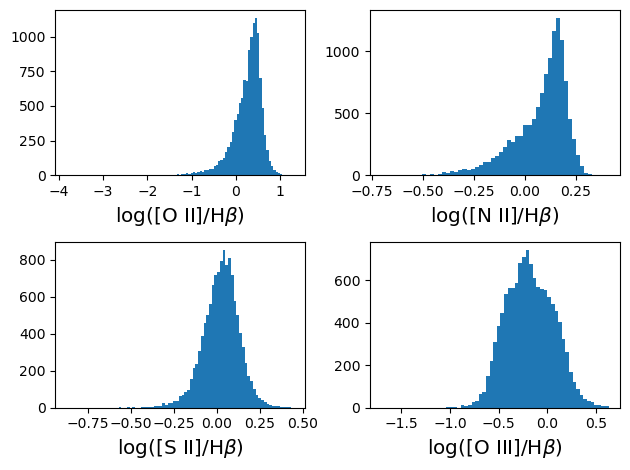

In [12]:
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax00 = fig.add_subplot(gs[0, 0])
ax00.hist(R2[cond], bins='scott')
ax00.set_xlabel(r'log([O II]/H$\beta$)', size='x-large')
ax01 = fig.add_subplot(gs[0, 1])
ax01.hist(N2[cond], bins='scott')
ax01.set_xlabel(r'log([N II]/H$\beta$)', size='x-large')
ax10 = fig.add_subplot(gs[1, 0])
ax10.hist(S2[cond], bins='scott')
ax10.set_xlabel(r'log([S II]/H$\beta$)', size='x-large')
ax11 = fig.add_subplot(gs[1, 1])
ax11.hist(R3[cond], bins='scott')
ax11.set_xlabel(r'log([O III]/H$\beta$)', size='x-large')

## Histograms of O3N2 and Metallicity

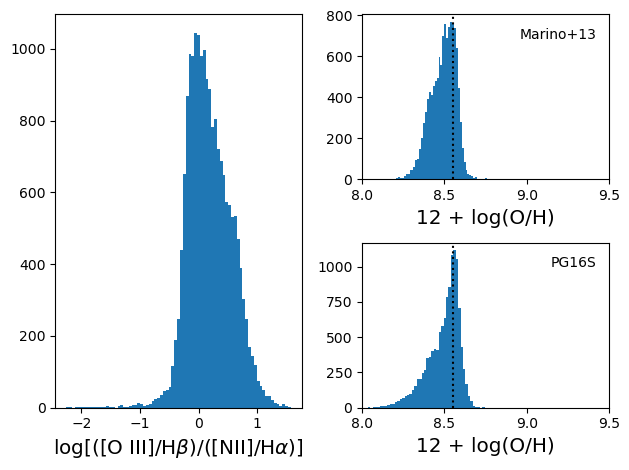

In [13]:
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[:, 0])
ax.hist(O3N2, bins='scott')
ax.set_xlabel(r'log[([O III]/H$\beta$)/([NII]/H$\alpha$)]', size='x-large')
ax1 = fig.add_subplot(gs[0, 1])
ax1.hist(ZOH_M13, bins='scott')
ax1.set_xlabel('12 + log(O/H)', size='x-large')
ax1.set_xlim([8,9.5])
ax1.text(0.95,0.85, 'Marino+13', ha='right', transform=ax1.transAxes)
ax1.axvline(8.55, ls=':', color='k')
ax2 = fig.add_subplot(gs[1, 1])
ax2.hist(ZOH_PG16S, bins='scott')
ax2.set_xlabel('12 + log(O/H)', size='x-large')
ax2.set_xlim([8,9.5])
ax2.text(0.95,0.85, 'PG16S', ha='right', transform=ax2.transAxes)
ax2.axvline(8.55, ls=':', color='k')